In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import sklearn

import numpy as np

In [3]:
from sklearn.datasets import load_wine

data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target_names[data.target]

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
features = df.iloc[:, :-1]
predictions = df.iloc[:, -1]

In [8]:
features.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [9]:
predictions.head()

0    class_0
1    class_0
2    class_0
3    class_0
4    class_0
Name: target, dtype: object

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
features_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=42, shuffle=True)

In [12]:
Train_data = pd.concat([X_train, y_train], axis = 'columns')
Train_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
158,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,-1.699872,-0.920468,-0.276711,class_2
137,-0.581338,2.848870,0.999674,1.653086,-0.262708,-0.809357,-1.434939,2.160669,-0.860096,-0.025128,-0.603037,-1.301828,-0.738463,class_2
98,-0.778980,-1.136754,-0.974210,-0.298767,-0.824415,1.962676,1.727556,-0.981875,0.629175,-0.241413,0.362177,0.223610,-0.276711,class_1
159,0.592164,-0.598156,0.999674,0.902373,-0.754202,0.488531,-0.932956,1.274310,1.224884,2.894719,-1.699872,-1.174708,-0.404091,class_2
38,0.085705,-0.750759,-0.974210,-1.199622,-0.122282,0.168065,0.613153,-0.659563,-0.387033,-0.587469,0.976405,0.110615,0.869707,class_0


In [13]:
Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,142.0,-0.026600,1.013060,-2.434235,-0.825303,0.011589,0.836129,2.259772
malic_acid,142.0,0.033369,1.026867,-1.298334,-0.647528,-0.414135,0.716920,3.109192
ash,142.0,-0.020732,1.020635,-3.679162,-0.572122,-0.023821,0.634140,3.156325
alcalinity_of_ash,142.0,-0.006518,1.037422,-2.671018,-0.689137,-0.088567,0.602088,3.154511
magnesium,142.0,0.049296,1.028681,-2.088255,-0.806862,-0.122282,0.509638,4.371372
total_phenols,142.0,-0.009659,1.021831,-2.107246,-0.913509,0.023855,0.808997,2.539515
flavanoids,142.0,-0.027265,1.008153,-1.695971,-0.907857,0.045912,0.816456,3.062832
nonflavanoid_phenols,142.0,0.049751,1.033563,-1.868234,-0.740141,-0.176095,0.871420,2.402403
proanthocyanins,142.0,0.030012,1.022614,-2.051513,-0.597284,-0.062898,0.659837,3.485073
color_intensity,142.0,-0.000209,1.008285,-1.435306,-0.795103,-0.198156,0.460432,3.435432


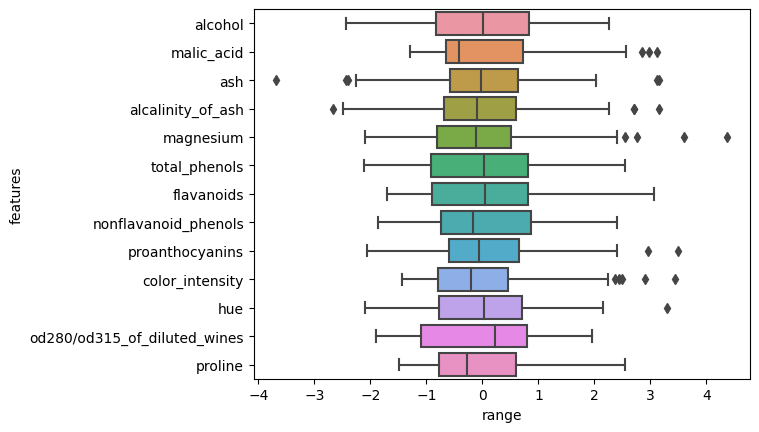

In [14]:
import seaborn as sns

sns.boxplot(data=X_train, orient="h").set(xlabel= 'range', ylabel='features')
plt.show()

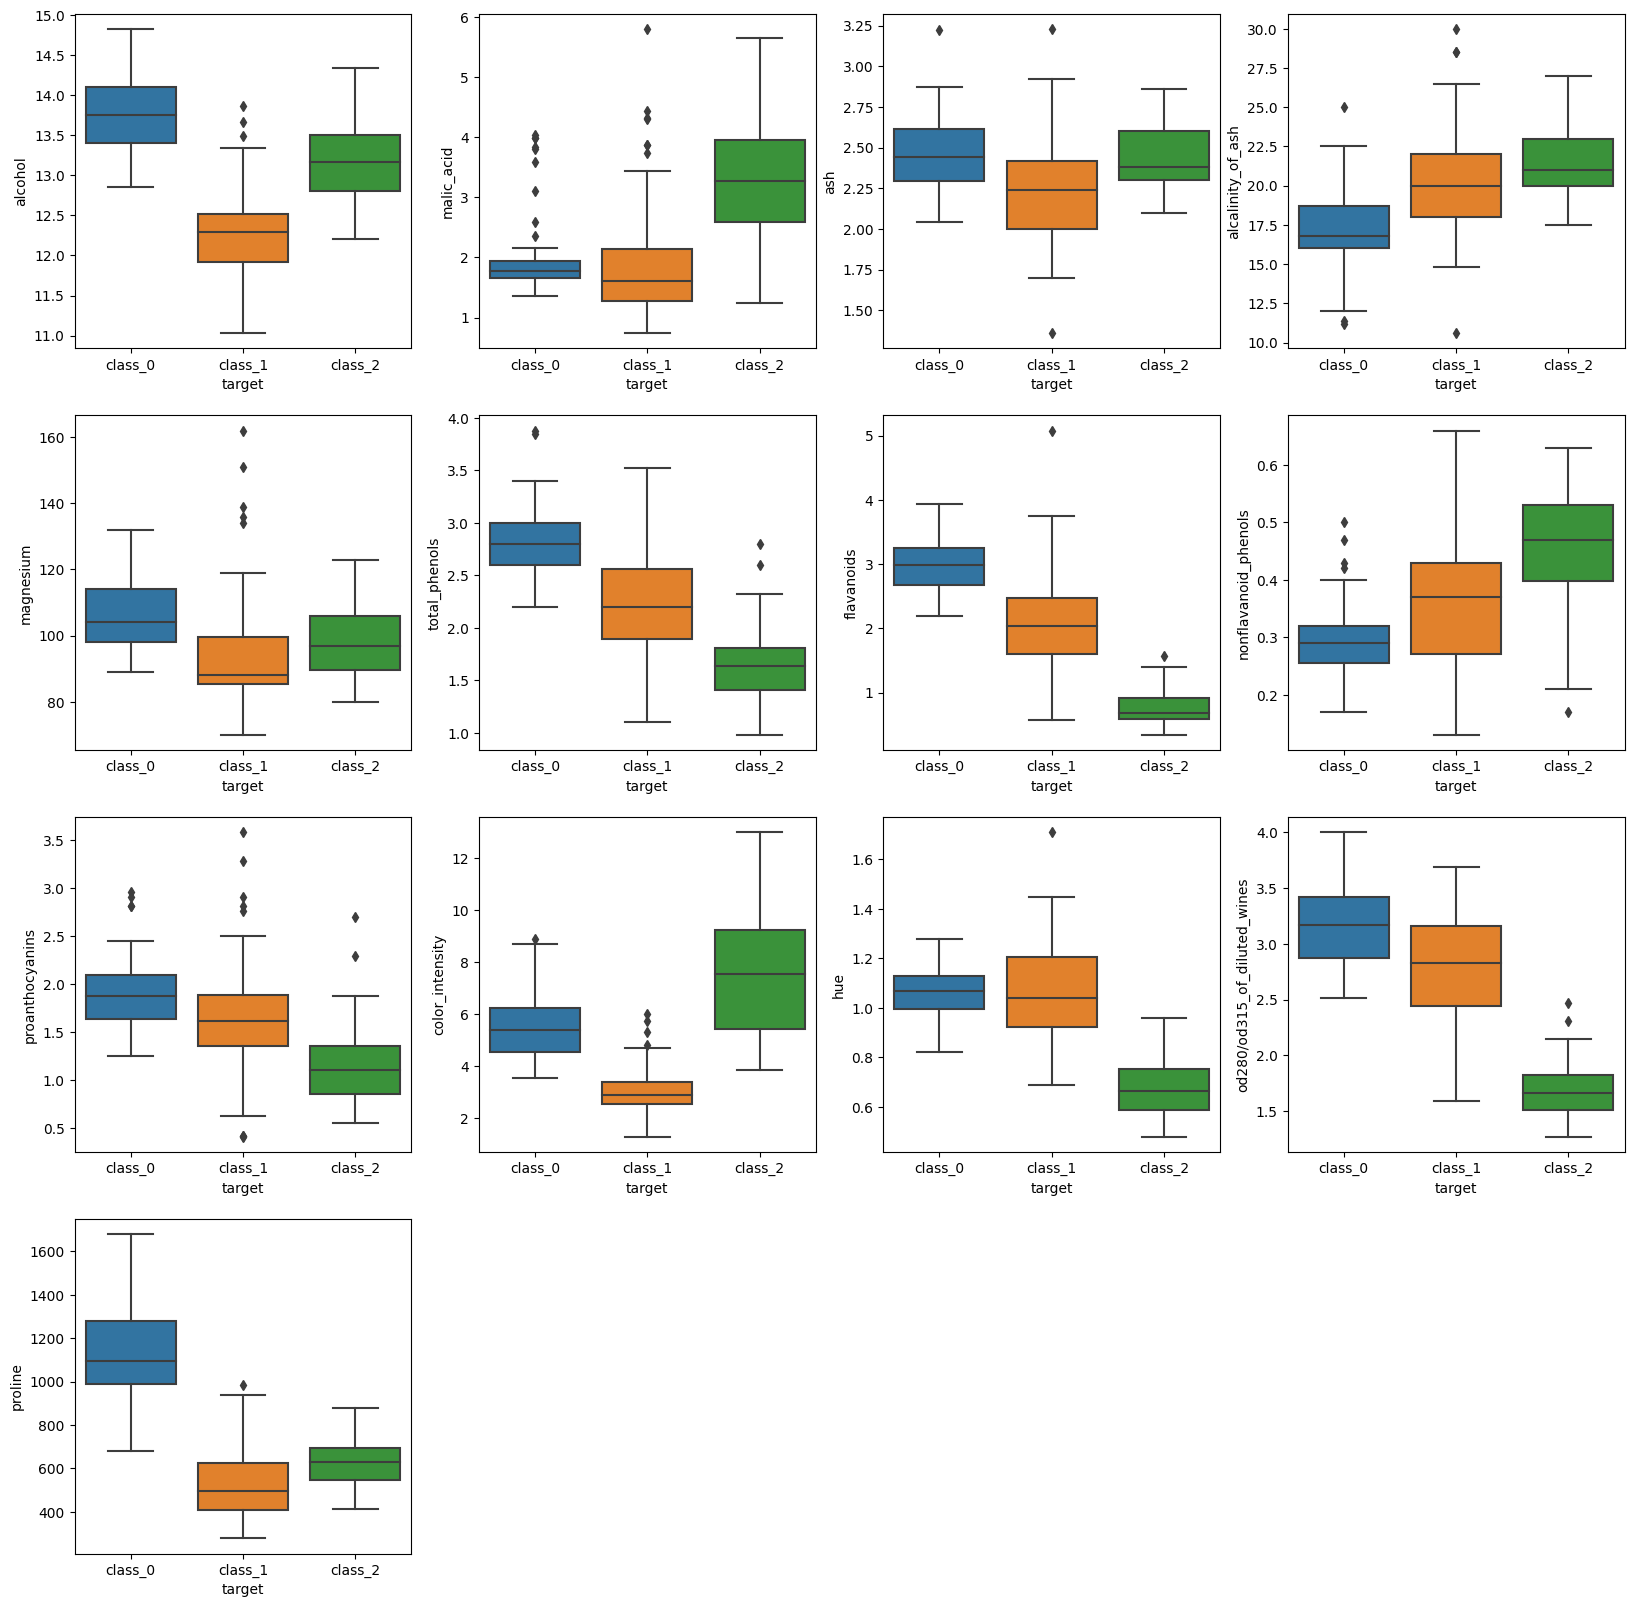

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))
for i,ax in enumerate(axes.flat):
    if i<13:
        sns.boxplot(data=df, x='target', y=df.columns[i], ax=ax)
    else:
        ax.set_visible(False)
plt.show()

In [16]:
classes, count = np.unique(y_train, return_counts=True)
count

array([45, 57, 40], dtype=int64)

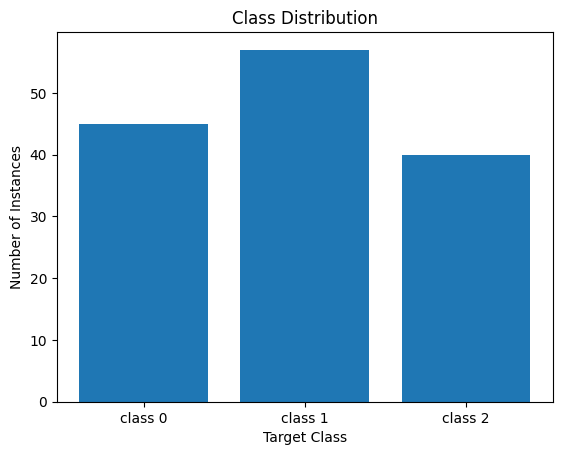

In [18]:
plt.bar(['class 0', 'class 1', 'class 2'], count)
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Number of Instances')
plt.show()

In [19]:
corr_mat = Train_data.corr(method='pearson')
corr_mat

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15900\4066176546.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = Train_data.corr(method='pearson')


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.055796,0.210046,-0.320004,0.217917,0.278724,0.216268,-0.085053,0.138966,0.519946,-0.067753,0.054754,0.620536
malic_acid,0.055796,1.000000,0.192373,0.304390,-0.122404,-0.320007,-0.402826,0.344370,-0.201422,0.253540,-0.530412,-0.369707,-0.223746
ash,0.210046,0.192373,1.000000,0.466770,0.237305,0.120319,0.110967,0.244765,-0.005865,0.255982,-0.099579,0.022017,0.194128
alcalinity_of_ash,-0.320004,0.304390,0.466770,1.000000,-0.108426,-0.300902,-0.340408,0.396773,-0.207839,0.028916,-0.264348,-0.255867,-0.464884
magnesium,0.217917,-0.122404,0.237305,-0.108426,1.000000,0.209067,0.191892,-0.249180,0.239194,0.151114,0.079686,0.102913,0.384754
total_phenols,0.278724,-0.320007,0.120319,-0.300902,0.209067,1.000000,0.849231,-0.420714,0.603498,-0.066604,0.397955,0.696331,0.469669
flavanoids,0.216268,-0.402826,0.110967,-0.340408,0.191892,0.849231,1.000000,-0.511011,0.640968,-0.208439,0.528331,0.803344,0.469888
nonflavanoid_phenols,-0.085053,0.344370,0.244765,0.396773,-0.249180,-0.420714,-0.511011,1.000000,-0.340449,0.216410,-0.293939,-0.485685,-0.281288
proanthocyanins,0.138966,-0.201422,-0.005865,-0.207839,0.239194,0.603498,0.640968,-0.340449,1.000000,-0.009833,0.267354,0.529222,0.319269
color_intensity,0.519946,0.253540,0.255982,0.028916,0.151114,-0.066604,-0.208439,0.216410,-0.009833,1.000000,-0.571049,-0.452531,0.283067


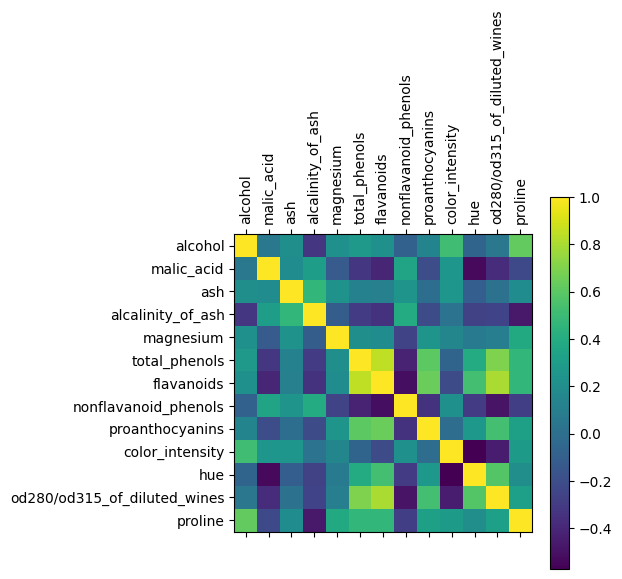

In [20]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

In [23]:
Train_data.drop(['flavanoids'], axis=1, inplace=True)
X_train.drop(['flavanoids'], axis=1, inplace=True)
X_test.drop(['flavanoids'], axis=1, inplace=True)

In [24]:
X_train.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
71,1.061565,-0.741782,1.109334,1.653086,-0.964842,1.049347,-1.223610,0.489009,-0.725891,1.766126,0.774463,-1.072834
106,-0.927212,-0.544297,-0.901103,-0.148624,-1.386122,-1.033684,0.065639,0.068508,-0.717240,0.186684,0.788587,-0.754385
14,1.703902,-0.418624,0.049285,-2.250619,0.158572,1.610163,-0.578985,2.398780,1.056297,1.064151,0.548472,2.547935
92,-0.383696,-0.723829,-0.389355,0.361860,-1.386122,-1.466313,1.757779,0.050988,-0.868639,0.011190,-0.779224,-0.802153
102,-0.816038,0.102021,0.341713,0.451946,-0.122282,0.424438,-0.176095,-0.492158,-0.976782,-0.690784,1.085200,-0.983669


In [29]:
X_train.shape

(142, 12)

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test Accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  0.972
Train confusion matrix: 
 [[43  2  0]
 [ 0 55  2]
 [ 0  0 40]]
Test Accuracy:  1.0
Test confusion matrix: 
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_mat_train = confusion_matrix(y_train, y_pred_train)
print("Evaluation metrics: Train Data")
print("Train accuracy: ", np.round(accuracy_train, decimals=3))
print("Train confusion matrix: \n", confusion_mat_train)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Test Accuracy: ", np.round(accuracy, decimals=3))
print("Test confusion matrix: \n", confusion_mat)

Evaluation metrics: Train Data
Train accuracy:  1.0
Train confusion matrix: 
 [[45  0  0]
 [ 0 57  0]
 [ 0  0 40]]
Test Accuracy:  1.0
Test confusion matrix: 
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [36]:
print("Model coefficients: ", model.coef_)
print("Corresponding Features: ", X_train.columns.values)

Model coefficients:  [[ 7.38914393e-01  1.30210736e-01  5.08923665e-01 -8.68452120e-01
   4.45276026e-02  3.44873048e-01 -2.35530217e-01  2.96934367e-01
   1.72554836e-01  2.36625343e-01  7.96877864e-01  1.05095857e+00]
 [-9.21399744e-01 -4.42895107e-01 -8.77221574e-01  6.62862334e-01
  -4.80006429e-02  3.95189517e-02  1.86096079e-01  3.27104598e-01
  -1.05387105e+00  7.27799263e-01  1.61999956e-01 -1.05004593e+00]
 [ 1.82485351e-01  3.12684371e-01  3.68297909e-01  2.05589786e-01
   3.47304031e-03 -3.84392000e-01  4.94341377e-02 -6.24038965e-01
   8.81316219e-01 -9.64424606e-01 -9.58877820e-01 -9.12641616e-04]]
Corresponding Features:  ['alcohol' 'malic_acid' 'ash' 'alcalinity_of_ash' 'magnesium'
 'total_phenols' 'nonflavanoid_phenols' 'proanthocyanins'
 'color_intensity' 'hue' 'od280/od315_of_diluted_wines' 'proline']
